In [1]:
# magic command to reload modules
%load_ext autoreload
%autoreload 2

In [2]:
# append sys.path
import sys
sys.path.append('../src')

from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from simulator.DM_model import DM_model
from parse_data.decode_parameter import decode_mat_fitted_parameters
from parse_data.parse_trial_data import parse_trial_data, compute_subject_acc, correctness_of_array
import os

In [3]:
import matplotlib as mpl
# remove top and right axis from plots
mpl.rcParams["axes.spines.right"] = True
mpl.rcParams["axes.spines.top"] = True

# remove all edges
mpl.rcParams["axes.edgecolor"] = "k"
mpl.rcParams['axes.linewidth'] = 2

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
mpl.rc('font', **font)

In [4]:
!pwd

/Volumes/GoogleDrive/My Drive/02. Master_NSC/02. 2023FS/NSC_Thesis/codes/notebook


## decode parameter from .mat file

In [5]:
# load .mat file
filePath = Path('../../data/params/263 models fitPars/data_fitPars_S1.mat')
paramsFitted = decode_mat_fitted_parameters(filePath)

In [6]:
paramsFitted.keys()

dict_keys(['bias', 'sigmas', 'BGLS', 'mechanismsMatrix', 'probRchoiceStoch', 'allModelsList'])

In [34]:
idx = 136

seqC1 = [0, 0.4, -0.4]
seqC2 = [0, 0.1, -0.1]
seqC3 = [0, -0.2, -0.2, 0.2, -0.2, 0.2, 0.2, 0, -0.2, 0.2, -0.2, 0, -0.2, 0, -0.2]
seqC4 = [0, 0.1, 0, 0.1, 0.1, -0.1, -0.1, -0.1, 0.1, 0, -0.1, 0.1, 0, 0, 0]

In [40]:
params = {}
params['bias']   = paramsFitted['bias'][idx]
params['sigmas'] = paramsFitted['sigmas'][idx,:]
params['BGLS']   = paramsFitted['BGLS'][idx, :, :]
params['modelName'] = paramsFitted['allModelsList'][idx]
print('Model: ' + paramsFitted['allModelsList'][idx])
# print(params['BGLS'])

Model: G6


In [41]:
model = BGLS_stoc_model(params=params)
a1, probR1 = model.stoch_simulation(seqC1)
# a2, probR2 = model.stoch_simulation(seqC2)
# a3, probR3 = model.stoch_simulation(seqC3)
# a4, probR4 = model.stoch_simulation(seqC4)

## 设置seeds 正态分布

In [61]:
from scipy.stats import norm
np.random.seed(111)
norm.ppf(np.random.rand(5))

array([ 0.28497976, -0.95784781, -0.16096872,  0.73642013, -0.53789345])

In [62]:
norm.ppf(np.random.rand(5))

array([-1.0400301 , -2.00505985, -0.20131921, -0.71054815, -0.4188683 ])

In [64]:
rn = norm.ppf(np.random.rand(1))
rn

array([-0.713635])

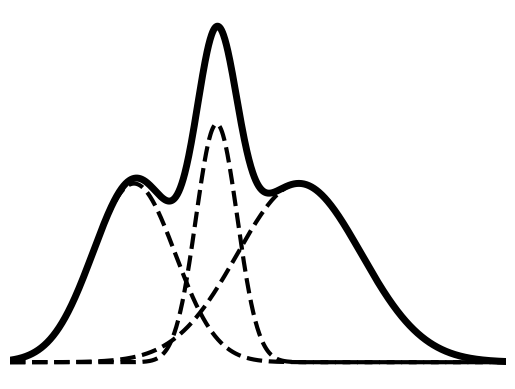

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# generate data
x = np.linspace(-5, 7, 1000)
y1 = 0.3*np.exp(-0.5 * ((x - (-2)) / 1)**2) / np.sqrt(2*np.pi)
y2 = 0.4*np.exp(-0.5 * ((x - 0) / 0.5)**2) / np.sqrt(2*np.pi)
y3 = 0.3*np.exp(-0.5 * ((x - 2) / 1.5)**2) / np.sqrt(2*np.pi)
ysum = y1 + y2 + y3

# plot Gaussian distributions and their summation
fig, ax = plt.subplots()
ax.plot(x, y1, label='Gaussian 1',color='k', linewidth=3, linestyle='--')
ax.plot(x, y2, label='Gaussian 2',color='k', linewidth=3, linestyle='--')
ax.plot(x, y3, label='Gaussian 3',color='k', linewidth=3, linestyle='--')
ax.plot(x, ysum, label='Sum of Gaussians',color='k', linewidth=5)
# ax.legend()
ax.set_xlim([-5,7])
# show plot
ax.axis('off')
# set tranparent background
fig.patch.set_facecolor('none')
plt.show()

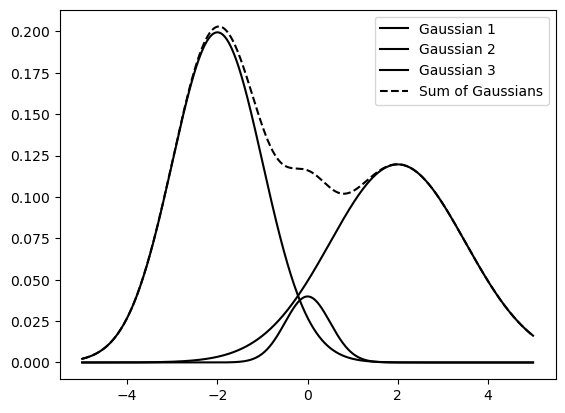

In [45]:
# generate data
mu, sigma = -1, 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y = np.exp(-0.5 * ((x - mu) / sigma)**2)
y1 = y / (sigma * np.sqrt(2*np.pi))

mu, sigma = 0, 0.8
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y = np.exp(-0.5 * ((x - mu) / sigma)**2)
y2 = y / (sigma * np.sqrt(2*np.pi))

mu, sigma = 1, 0.3
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y = np.exp(-0.5 * ((x - mu) / sigma)**2)
y3 = y / (sigma * np.sqrt(2*np.pi))

# plot Gaussian
fig, ax = plt.subplots()
ax.plot(x, y1+y2+y3, 'k', linewidth=6, label='Gaussian')
ax.set_xlim([-3, 3])
ax.axis('off')
# set tranparent background
fig.patch.set_facecolor('none')

# show plot
plt.show()

## load trial data and generate input pattern summary

In [78]:
from parse_data.parse_trial_data import parse_trial_data
trial = parse_trial_data('../../data/trials.mat')

idx, _ = np.where(trial['subjID'] == 1)

In [79]:
_dur = trial['dur'][idx]
_nLeft = trial['nLeft'][idx]
_nRight = trial['nRight'][idx]

dur = (trial['dur'][idx] -1) / 14
nLeft = trial['nLeft'][idx] / 14
nRight = trial['nRight'][idx] / 14
nPulse = (_dur-_nLeft-_nRight-1) / 14
hist_nLsame = trial['hist_nLsame'][idx]/(_dur-1)
hist_nLoppo = trial['hist_nLoppo'][idx]/(_dur-1)
hist_nLelse = trial['hist_nLelse'][idx]/(_dur-1)
hist_nRsame = trial['hist_nRsame'][idx]/(_dur-1)
hist_nRoppo = trial['hist_nRoppo'][idx]/(_dur-1)
hist_nRelse = trial['hist_nRelse'][idx]/(_dur-1)

hist_nSame = hist_nLsame + hist_nRsame
hist_nOppo = hist_nLoppo + hist_nRoppo
hist_nElse = hist_nLelse + hist_nRelse

x1 = np.hstack((trial['MS'][idx], dur, nLeft, nRight, nPulse, hist_nLsame, hist_nLoppo, hist_nLelse, hist_nRsame, hist_nRoppo, hist_nRelse))
x2 = np.hstack((trial['MS'][idx], dur, nLeft, nRight, nPulse, hist_nSame, hist_nOppo, hist_nElse))
x1.shape, x2.shape

((14994, 11), (14994, 8))

In [80]:
np.nan_to_num(trial['pulse'][idx], nan=100)

array([[  0. ,  -0.2,  -0.2, ..., 100. , 100. , 100. ],
       [  0. ,   0. ,   0.1, ..., 100. , 100. , 100. ],
       [  0. ,   0.2,   0.2, ..., 100. , 100. , 100. ],
       ...,
       [  0. ,  -0.2,   0.2, ...,  -0.2,   0.2,  -0.2],
       [  0. ,   0. ,   0.1, ...,  -0.1,  -0.1,   0. ],
       [  0. ,   0. ,  -0.4, ...,   0. ,   0.4,   0.4]])

In [81]:
uniques1, counts1 =np.unique(x1, axis=0, return_counts=True)
uniques2, counts2 =np.unique(x2, axis=0, return_counts=True)
uniques3, counts3 =np.unique(np.nan_to_num(trial['pulse'][idx], nan=100), axis=0, return_counts=True)
counts1.shape, counts2.shape, counts3.shape

((6116,), (4188,), (10049,))

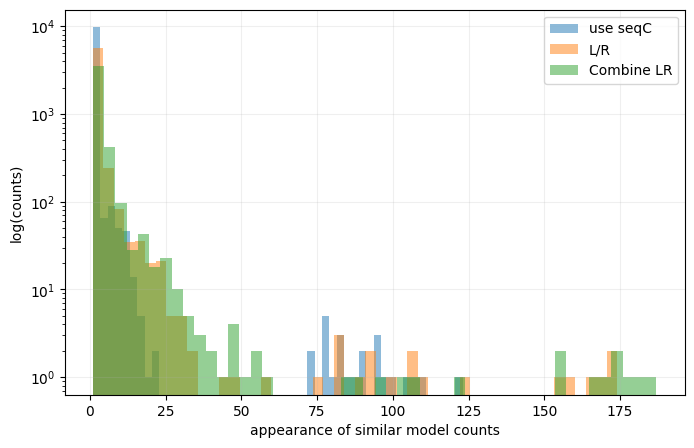

In [33]:
# two subplots
f, ax = plt.subplots(1, figsize=(8,5))
ax.hist(counts3, bins=50, alpha=0.5, label='use seqC')
ax.hist(counts1, bins=50, alpha=0.5, label='L/R')
ax.hist(counts2, bins=50, alpha=0.5, label='Combine LR')

# ax1.plot(counts1)
# ax.plot(counts2)

ax.set_yscale('log')

ax.set_xlabel('appearance of similar model counts')
ax.set_ylabel('log(counts)')
# ax.set_ylabel('log(counts)')

ax.grid(alpha=0.2)

ax.legend()

plt.subplots_adjust(hspace=0.3)

## 数据信息提取 summary input data (general case)

In [7]:
import numpy as np

seqC = np.array([[0, 0.4, -0.4, 0.4, 0.4, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                 [0, -0.4, -0.4, -0.4, -0.4, 0, 0.4, 0.4, -0.4, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]])

roll_value = 0
seqCrolled = np.roll(seqC, 1, axis=1)
seqCrolled[:, 0] = roll_value
seqCrolled = seqC * seqCrolled

seqCrolled

array([[ 0.  ,  0.  , -0.16, -0.16,  0.16,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan],
       [ 0.  , -0.  ,  0.16,  0.16,  0.16, -0.  ,  0.  ,  0.16, -0.16,
          nan,   nan,   nan,   nan,   nan,   nan]])

In [8]:
import numpy as np

seqC = np.array([[0, 0.4, -0.4, 0.4, 0.4, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                 [0, -0.2, -0.2, -0.2, -0.2, 0, 0.2, 0.2, -0.2, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]])

# seqC = trial['pulse'][:2,:]

MS      = np.apply_along_axis(lambda x: np.unique(np.abs(x[(~np.isnan(x))&(x!=0)])), axis=1, arr=seqC).reshape(-1)
_dur    = np.apply_along_axis(lambda x: np.sum(~np.isnan(x)), axis=1, arr=seqC)
_nLeft  = np.apply_along_axis(lambda x: np.sum(x<0), axis=1, arr=seqC)
_nRight = np.apply_along_axis(lambda x: np.sum(x>0), axis=1, arr=seqC)
_nPulse = _dur - _nLeft - _nRight

hist_nSame  = np.apply_along_axis(lambda x: np.sum(x*np.append(0, x[0:-1])>0), axis=1, arr=seqC)/(_dur-1)
hist_nLsame = np.apply_along_axis(lambda x: np.sum((x*np.append(0, x[0:-1])>0) & (x<0)), axis=1, arr=seqC)/(_dur-1)
hist_nRsame = np.apply_along_axis(lambda x: np.sum((x*np.append(0, x[0:-1])>0) & (x>0)), axis=1, arr=seqC)/(_dur-1)

hist_nOppo  = np.apply_along_axis(lambda x: np.sum(x*np.append(0, x[0:-1])<0), axis=1, arr=seqC)/(_dur-1)
hist_nLoppo = np.apply_along_axis(lambda x: np.sum((x*np.append(0, x[0:-1])<0) & (x<0)), axis=1, arr=seqC)/(_dur-1)
hist_nRoppo = np.apply_along_axis(lambda x: np.sum((x*np.append(0, x[0:-1])<0) & (x>0)), axis=1, arr=seqC)/(_dur-1)

hist_nElse  = np.apply_along_axis(lambda x: np.sum( (x*np.append(0, x[0:-1])==0) & (x!=0) ), axis=1, arr=seqC)/(_dur-1)
hist_nLelse = np.apply_along_axis(lambda x: np.sum( (x*np.append(0, x[0:-1])==0) & (x<0) ), axis=1, arr=seqC)/(_dur-1)
hist_nRelse = np.apply_along_axis(lambda x: np.sum( (x*np.append(0, x[0:-1])==0) & (x>0) ), axis=1, arr=seqC)/(_dur-1)

dur     = (_dur-1)/14
nLeft   = _nLeft/14
nRight  = _nRight/14
nPulse  = (_dur-1-_nLeft-_nRight)/14

x1 = np.vstack((MS, dur, nLeft, nRight, nPulse, hist_nLsame, hist_nLoppo, hist_nLelse, hist_nRsame, hist_nRoppo, hist_nRelse)).T
x2 = np.vstack((MS, dur, nLeft, nRight, nPulse, hist_nSame, hist_nOppo, hist_nElse)).T
x1, x2

(array([[0.4       , 0.28571429, 0.07142857, 0.21428571, 0.        ,
         0.        , 0.25      , 0.        , 0.25      , 0.25      ,
         0.25      ],
        [0.2       , 0.57142857, 0.35714286, 0.14285714, 0.07142857,
         0.375     , 0.125     , 0.125     , 0.125     , 0.        ,
         0.125     ]]),
 array([[0.4       , 0.28571429, 0.07142857, 0.21428571, 0.        ,
         0.25      , 0.5       , 0.25      ],
        [0.2       , 0.57142857, 0.35714286, 0.14285714, 0.07142857,
         0.5       , 0.125     , 0.25      ]]))

## test sequence_pattern_summary function output

In [10]:
from dataset.seqC_pattern_summary import *
seqC_pattern_summary(seqC, summaryType=2)

array([[0.4       , 0.28571429, 0.07142857, 0.21428571, 0.        ,
        0.25      , 0.5       , 0.25      ],
       [0.2       , 0.57142857, 0.35714286, 0.14285714, 0.07142857,
        0.5       , 0.125     , 0.25      ]])

In [11]:
from parse_data.parse_trial_data import parse_trial_data
trial = parse_trial_data('../../data/trials.mat')

idx, _ = np.where(trial['subjID'] == 1)
seqC = trial['pulse'][idx]

In [12]:
x_c = seqC_pattern_summary(seqC, summaryType=2)

(15,)